# Misinformation Games Adaptation Procedure
An extensive example for the Adaptation Procedure programme on a 2x2 misinformation game.

In [31]:
## Initialization Block
# Libraries
import adaptation_procedure as ap

# Example File Name
exam_file_name = "../input_data/2x2_mg_example.mg"

# Initialize Adaptation Procedure
adapt_proc = ap.AdaptationProcedure()

# Initialize from File
f = open(exam_file_name)
file_fmt = f.read()
f.close()

adapt_proc.root_from_file(file_fmt)

In [32]:
## Print Root
root_file_fmt = adapt_proc.root_export()
print(root_file_fmt)

# Misinformation Game: 0
# NMEs: [(2, 1), (2, 2)]
# num players
2

# strategies
2 2 

# Game id: 0
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 1
# Nash Equilibria: [((0.0, 1.0), (0.0, 1.0))]
2 2 
3 0 
0 3 
1 1 


# Game id: 2
# Nash Equilibria: [((0.666667, 0.333333), (0.333333, 0.666667)), ((1.0, 0.0), (1.0, 0.0)), ((0.0, 1.0), (0.0, 1.0))]
2 1 
0 0 
0 0 
1 2 





## Input Misinformation Game
The Input File represents a 2x2 Misinformation Game, constisted of 3 NFG. Let $\mathcal{M} = \langle F, G, H \rangle$ be the misinformation game, we have:

$$
\begin{align*}
    F_{I} =
    \begin{pmatrix}
        1 & -1\\
        -1 & 1
    \end{pmatrix}
    \quad
    F_{II} =
    \begin{pmatrix}
        -1 & 1\\
        1 & -1
    \end{pmatrix}
\end{align*}
$$
$$
\begin{align*}
    G_{I} =
    \begin{pmatrix}
        2 & 0\\
        3 & 1
    \end{pmatrix}
    \quad
    G_{II} =
    \begin{pmatrix}
        2 & 3\\
        0 & 1
    \end{pmatrix}
\end{align*}
$$
$$
\begin{align*}
    H_{I} =
    \begin{pmatrix}
        2 & 0\\
        0 & 1
    \end{pmatrix}
    \quad
    H_{II} =
    \begin{pmatrix}
        1 & 0\\
        0 & 2
    \end{pmatrix}
\end{align*}
$$

Where the Nash Equilibria for each NFG are:

$$
    \mathtt{NE}(F) = \left\{ \left( \left( \frac{1}{2}, \frac{1}{2} \right) \left( \frac{1}{2}, \frac{1}{2} \right) \right) \right\}
$$
$$
    \mathtt{NE}(G) = \left\{ \left( \left( 0, 1 \right) \left( 0, 1 \right) \right) \right\}
$$
$$
    \mathtt{NE}(H) = \left\{ \left( \left( \frac{2}{3}, \frac{1}{3} \right) \left( \frac{1}{3}, \frac{2}{3} \right) \right), ~((1, 0), (1, 0)), ~((0, 1), (0, 1)) \right\}
$$

Therefore, the Natural Misinformed Equilibria (NME) for this misinformation game, are:

$$
    \mathtt{NME}(\mathcal{M}) = \{(2, 1), (2, 2)\}
$$

In [33]:
## Adaptation Procedure
adapt_proc.adaptation_procedure()
adapt_proc.print_stats()

+---------------------------------------
| Number of players: 2
| Strategies Vector: [2, 2]
+---------------------------------------
| CPU time: 0.10179634000000015(s)
| Number of nodes: 26
| Number of unique MGs: 6
| Number of leaves: 17
| Number of Unique Stable Games: 4
+---------------------------------------


Since our MG is consisted of 3 2x2 NFG, a rough upper bound to the number of unique MGs that could be produced is $2^{2^2} = 16$, as the number of the subsets of strategy profiles that can be updated by the real game F. Yet for this particular input game, only 6 unique MGs are produced. On the other hand, we observe that we arrive to the same MG through many different routes, hence the total number of nodes is 26.

In [34]:
## Print Stable Set
adapt_proc.print_stable_set()

MG_3: ((2, 1), (2, 2))
MG_5: ((1, 1), (1, 2), (2, 1), (2, 2))
MG_4: ((1, 1), (2, 1), (2, 2))
MG_1: ((2, 1),)


## Stable Set & Leafs
As we can see, the cardinality of the stable set is 4. Let $\mathcal{M}_{p}$ be a misinformation game in the above adaptation procedure and $\mathtt{NME}(\mathcal{M}_{p})$ be the set o NMEs of $\mathcal{M}_{p}$. Also, let

$$
\mathcal{M}_{c} \gets \mathtt{adaptation\_substep}(\mathcal{M}_{p}, nme)
$$

be a child of $\mathcal{M}_{p}$, for some $nme \in \mathtt{NME}(\mathcal{M}_{p})$. The $\mathcal{M}_{c}$ will be a *leaf* iff,

$$
\mathcal{M}_{c} = \mathcal{M}_{p}
$$

This is beacause, in all subsequent steps of the adaptation procedure, $\mathcal{M}_{c}$ will produce exactly the same MGs as $\mathcal{M}_{p}$. Therefore, without loss of generality, we may stop considering $\mathcal{M}_{c}$.

This results in $\mathcal{M}_{c}$ being a *leaf*. The *Stable Set* is constisted of all the *unique* MGs, that are leafs.

Let $\mathcal{M}_{s}$, be a misinformation game that is in the *stable set* $S$ of some adaptation procedure. Let $\mathtt{NME}(\mathcal{M}_{s})$ be the set of the natural misinformed equilibria of $\mathcal{M}_{s}$. We define the set of all MGs produced by $\mathcal{M}_{s}$ as follows,

$$
\mathtt{adaptation\_step}(\mathcal{M}_{s}) = \{ \mathcal{M} \mid \mathcal{M} \gets \mathtt{adaptation\_substep}(\mathcal{M}_{s}, nme), ~~ nme \in \mathtt{NME}(\mathcal{M}_{s})\}
$$

Note that the following holds,

$$
\mathtt{adaptation\_step}(\mathcal{M}_{s}) \cup \{\mathcal{M}_{s}\} \subseteq S
$$

For all other MGs $\mathcal{M}$ of the adaptation procedure holds that,

$$
\mathtt{adaptation\_step}(\mathcal{M}) \subseteq S
$$

but not necesserly $\mathcal{M} \in S$.

In [35]:
## Print Tree
adapt_proc.print_tree()

N_0, MG_0
├── N_00, MG_1
│   ├── N_000, MG_1
│   └── N_001, MG_3
│       ├── N_0010, MG_4
│       │   ├── N_00100, MG_4
│       │   ├── N_00101, MG_4
│       │   ├── N_00102, MG_5
│       │   │   ├── N_001020, MG_5
│       │   │   ├── N_001021, MG_5
│       │   │   ├── N_001022, MG_5
│       │   │   └── N_001023, MG_5
│       │   └── N_00103, MG_4
│       └── N_0011, MG_3
└── N_01, MG_2
    └── N_010, MG_3
        ├── N_0100, MG_4
        │   ├── N_01000, MG_4
        │   ├── N_01001, MG_4
        │   ├── N_01002, MG_5
        │   │   ├── N_010020, MG_5
        │   │   ├── N_010021, MG_5
        │   │   ├── N_010022, MG_5
        │   │   └── N_010023, MG_5
        │   └── N_01003, MG_4
        └── N_0101, MG_3


## Adaptation Tree
Let us focus on a section of the above tree, depicted below.

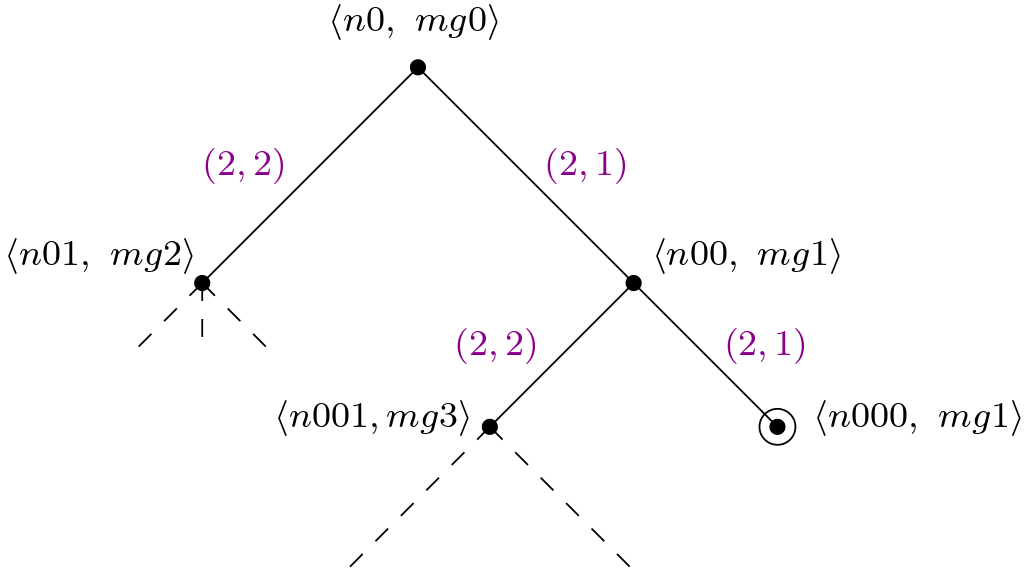

We have that,
$$
 mg1 \gets \mathtt{adaptation\_substep}(mg0, (2, 1))
$$
Obviously, when we apply the the same nme in mg1, we get the same MG,
$$
mg1 = \mathtt{adaptation\_substep}(mg1, (2, 1))
$$
On the other hand, we have that,
$$
 mg2 \gets \mathtt{adaptation\_substep}(mg0, (2, 2))
$$

In [36]:
## Print Unique MGs
adapt_proc.print_mg_pool()

| MG id: 0
| Natural Misinformed Equilibria: {1: [2], 2: [1, 2]}
| NMEs list: [(2, 1), (2, 2)]
| Unique Key: ()

| MG id: 1
| Natural Misinformed Equilibria: {1: [2], 2: [1, 2]}
| NMEs list: [(2, 1), (2, 2)]
| Unique Key: ((2, 1),)

| MG id: 2
| Natural Misinformed Equilibria: {1: [2], 2: [1]}
| NMEs list: [(2, 1)]
| Unique Key: ((2, 2),)

| MG id: 3
| Natural Misinformed Equilibria: {1: [1, 2], 2: [1]}
| NMEs list: [(1, 1), (2, 1)]
| Unique Key: ((2, 1), (2, 2))

| MG id: 4
| Natural Misinformed Equilibria: {1: [1, 2], 2: [1, 2]}
| NMEs list: [(1, 1), (2, 1), (1, 2), (2, 2)]
| Unique Key: ((1, 1), (2, 1), (2, 2))

| MG id: 5
| Natural Misinformed Equilibria: {1: [1, 2], 2: [1, 2]}
| NMEs list: [(1, 1), (2, 1), (1, 2), (2, 2)]
| Unique Key: ((1, 1), (1, 2), (2, 1), (2, 2))



In [37]:
## Print Stable Set Files
str_stable_files = adapt_proc.str_export_stable_set()
print(str_stable_files)

# Unique Key: ((2, 1), (2, 2))
# Misinformation Game: 3
# NMEs: [(1, 1), (2, 1)]
# num players
2

# strategies
2 2 

# Game id: 0
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 1
# Nash Equilibria: [((0.666667, 0.333333), (0.25, 0.75))]
2 2 
-1 1 
0 3 
1 -1 


# Game id: 2
# Nash Equilibria: [((1.0, 0.0), (1.0, 0.0))]
2 1 
-1 1 
0 0 
1 -1 




# Unique Key: ((1, 1), (1, 2), (2, 1), (2, 2))
# Misinformation Game: 5
# NMEs: [(1, 1), (2, 1), (1, 2), (2, 2)]
# num players
2

# strategies
2 2 

# Game id: 0
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 1
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 2
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 




# Unique Key: ((1, 1), (2, 1), (2, 2))
# Misinformation Game: 4
# NMEs: [(1, 1), (2, 1), (1, 2), (2, 2)]
# num players
2

# strategies
2 2 

# Game id: 0
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 


## Adaptation Procedure for Stable MGs
We run now the Adaptation Procedure for the MGs mg5 and mg1. We will observe that the behaviour of these games is quite different dispite the fact that both of the belong to the stable set of the mg0. This shows us that the *stability* of the stable set is a property of the set, not of the individual elements.

In [38]:
## Run the Adaptation Procedure for stable MGs
# first for MG_5
uniq_key_mg_5 = ((1, 1), (1, 2), (2, 1), (2, 2))
mg_5_file_fmt = adapt_proc.str_export_mg_by_key(uniq_key_mg_5)
print(mg_5_file_fmt)

# Misinformation Game: 5
# NMEs: [(1, 1), (2, 1), (1, 2), (2, 2)]
# num players
2

# strategies
2 2 

# Game id: 0
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 1
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 2
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 





In [40]:
# Running the Adaptation Procedure
adapt_proc_mg5 = ap.AdaptationProcedure()
adapt_proc_mg5.root_from_file(mg_5_file_fmt)
adapt_proc_mg5.adaptation_procedure(True)
adapt_proc_mg5.print_tree()

N_0, MG_0
├── N_00, MG_0
├── N_01, MG_0
├── N_02, MG_0
└── N_03, MG_0


In [42]:
# Show Stable Set
adapt_proc_mg5.print_mg_pool()

| MG id: 0
| Natural Misinformed Equilibria: {1: [1, 2], 2: [1, 2]}
| NMEs list: [(1, 1), (2, 1), (1, 2), (2, 2)]
| Unique Key: ()



### MG_5 Results
Observe that the following holds,
$$
\{mg5\} = \mathtt{adaptation\_step}(mg5)
$$
I.e. the stable set of mg5 is a singleton containing only itself.

In [45]:
# first for MG_1
uniq_key_mg_1 = ((2, 1),)
mg_1_file_fmt = adapt_proc.str_export_mg_by_key(uniq_key_mg_1)
print(mg_1_file_fmt)

# Misinformation Game: 1
# NMEs: [(2, 1), (2, 2)]
# num players
2

# strategies
2 2 

# Game id: 0
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 1
# Nash Equilibria: [((0.0, 1.0), (0.0, 1.0))]
2 2 
-1 1 
0 3 
1 1 


# Game id: 2
# Nash Equilibria: [((1.0, 0.0), (1.0, 0.0)), ((0.5, 0.5), (0.25, 0.75)), ((0.0, 1.0), (0.0, 1.0))]
2 1 
-1 1 
0 0 
1 2 





In [46]:
# Running the Adaptation Procedure
adapt_proc_mg1 = ap.AdaptationProcedure()
adapt_proc_mg1.root_from_file(mg_1_file_fmt)
adapt_proc_mg1.adaptation_procedure(True)
adapt_proc_mg1.print_tree()

N_0, MG_0
├── N_00, MG_0
└── N_01, MG_1
    ├── N_010, MG_2
    │   ├── N_0100, MG_2
    │   ├── N_0101, MG_2
    │   ├── N_0102, MG_3
    │   │   ├── N_01020, MG_3
    │   │   ├── N_01021, MG_3
    │   │   ├── N_01022, MG_3
    │   │   └── N_01023, MG_3
    │   └── N_0103, MG_2
    └── N_011, MG_1


In [48]:
# Show Stable Set
adapt_proc_mg1.print_mg_pool()

| MG id: 0
| Natural Misinformed Equilibria: {1: [2], 2: [1, 2]}
| NMEs list: [(2, 1), (2, 2)]
| Unique Key: ()

| MG id: 1
| Natural Misinformed Equilibria: {1: [1, 2], 2: [1]}
| NMEs list: [(1, 1), (2, 1)]
| Unique Key: ((2, 2),)

| MG id: 2
| Natural Misinformed Equilibria: {1: [1, 2], 2: [1, 2]}
| NMEs list: [(1, 1), (2, 1), (1, 2), (2, 2)]
| Unique Key: ((1, 1), (2, 2))

| MG id: 3
| Natural Misinformed Equilibria: {1: [1, 2], 2: [1, 2]}
| NMEs list: [(1, 1), (2, 1), (1, 2), (2, 2)]
| Unique Key: ((1, 1), (1, 2), (2, 2))



### MG_1 Results
On the other hand, this is not the case for mg1. We have,
$$
\{𝑚𝑔5\} \subset 𝚊𝚍𝚊𝚙𝚝𝚊𝚝𝚒𝚘𝚗⎯𝚜𝚝𝚎𝚙(𝑚𝑔5)
$$
Despite that, in both cases the misinformation game generates itself and belongs to its respective stable set. Morover, observe that $mg5 \in \mathtt{stable\_set}(mg1)$, see mg3 above.

In [50]:
uniq_key_mg_1_mg_3 = ((1, 1), (1, 2), (2, 2))
mg_1_mg_3_file_fmt = adapt_proc_mg1.str_export_mg_by_key(uniq_key_mg_1_mg_3)
print(mg_1_mg_3_file_fmt)

# Misinformation Game: 3
# NMEs: [(1, 1), (2, 1), (1, 2), (2, 2)]
# num players
2

# strategies
2 2 

# Game id: 0
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 1
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 


# Game id: 2
# Nash Equilibria: [((0.5, 0.5), (0.5, 0.5))]
1 -1 
-1 1 
-1 1 
1 -1 



